In [4]:
from fenics import *
from mshr import *
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate


In [51]:
def solver(meshsize,R):
    degree=2
    domain = Rectangle(Point(-1, -0.5),Point(1, 1))
    circ2 = Circle(Point(-0.8, 0.8), R)
    domain.set_subdomain(2, circ2)
    circ3 = Circle(Point(0.8, 0.8), R)
    domain.set_subdomain(3, circ3)

    
    mesh = generate_mesh(domain, meshsize)   
    V = FunctionSpace(mesh, 'P', degree)

    def boundary(x, on_boundary):
        return on_boundary

    boundary_markers = MeshFunction('size_t', mesh, 2, mesh.domains())
    boundaries = MeshFunction('size_t', mesh, 1, mesh.domains())
    for f in facets(mesh):
        domains = []
        for c in cells(f):
            domains.append(boundary_markers[c])
        domains = list(set(domains))
        if len(domains) > 1:     
            boundaries[f]=np.max(domains)

    pad_bc2 = DirichletBC(V, Constant(0), boundaries, 2)
    pad_bc3 = DirichletBC(V, Constant(1), boundaries, 3)
    boundary_bc = DirichletBC(V, Constant(0), boundary)
    bc = [pad_bc2, pad_bc3]

    #variational problem
    u = TrialFunction(V)
    v = TestFunction(V)
    a = dot(grad(u), grad(v))*dx
    g = Constant('0')
    L = Constant('0') * v * dx - g*v*ds
        
    # Compute solution
    u = Function(V)
    solve(a == L, u, bc)
    return u



In [30]:
def run_solver(meshsize,R):
    V = solver(meshsize,R)
    
    plt.figure(figsize=[14,12])
    plt.subplot(3,3,1)
    plot(V.function_space().mesh(),linewidth=0.5)
    p=plot(V,cmap='magma');plt.colorbar(p);
    plt.title('Mesh & V(x,y)');plt.xlabel('x');plt.ylabel('y')
    
    plt.subplot(3,3,2)
    p=plot(V,cmap='magma');plt.colorbar(p)
    plt.title('V(x,y)');plt.xlabel('x');plt.ylabel('y')
    plt.tight_layout()

    plt.subplot(3,3,4);jx=project(V.dx(0))
    p=plot(jx,cmap='magma');plt.colorbar(p);
    y = np.linspace(-1,1,100);
    plt.plot(np.zeros(len(y)),y,'k--')
    plt.title('j$_x$(x,y)');plt.xlabel('x');plt.ylabel('y')

    plt.subplot(3,3,5);jy=project(V.dx(1))
    p=plot(jy,cmap='magma');plt.colorbar(p);
    x = np.linspace(-1,1,100);
    plt.plot(x,np.zeros(len(x)),'k--')
    plt.title('j$_y$(x,y)');plt.xlabel('x');plt.ylabel('y')
    
    plt.subplot(3,3,6);p=plot((grad(V)),cmap='magma');plt.colorbar(p);
    plt.title('j(x,y)');plt.xlabel('x');plt.ylabel('y')

    plt.subplot(3,3,7)
    jxvalues = [(jx(0,ii)) for ii in y]
    plt.plot(y,jxvalues,'k--');plt.xlabel('y');plt.ylabel('j$_x$(0,y)')
    
    plt.subplot(3,3,8)
    x = np.linspace(-1,1,100)
    jyvalues = [(jy(ii,0)) for ii in x]
    plt.plot(x,jyvalues,'k--');plt.xlabel('x');plt.ylabel('j$_x$(x,0)')
    
    plt.subplot(3,3,9)
    Jx=scipy.integrate.cumtrapz(jxvalues,y)
    plt.plot(y[0:-1],Jx);plt.xlabel('y');plt.ylabel(r'$\int$j$_x$(0,y)dy')
    
    plt.tight_layout()
    print('J='+str(np.max(Jx)))
    print('ΔV='+str(V(0.8,-0.8)-V(-0.8,-0.8)))
    print('J/ΔV='+str(np.max(Jx)/(V(0.8,-0.8)-V(-0.8,-0.8))))


In [43]:
def run_solver2(meshsize,R):
    V = solver(meshsize,R)
    plt.figure(figsize=[12,5])
    plt.subplot(1,2,1)
    p=plot(V,cmap='magma');plt.colorbar(p);
    plt.subplot(1,2,2)
    p=plot((grad(V)),cmap='magma');plt.colorbar(p);
    plt.title('j(x,y)');plt.xlabel('x');plt.ylabel('y')
    
    
    return V

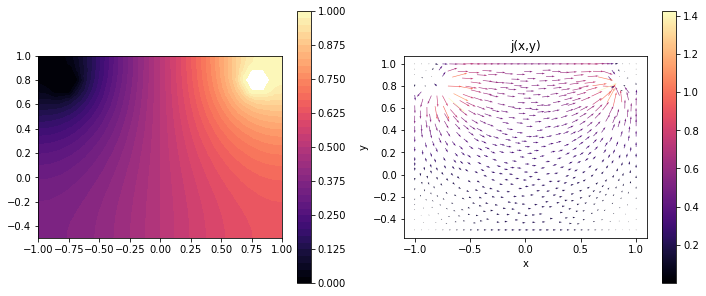

In [52]:
V=run_solver2(20,0.1)

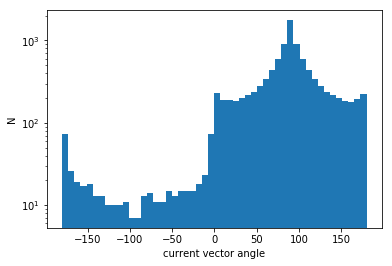

In [53]:
jx=project(V.dx(0))
jy=project(V.dx(1))

x = np.linspace(-1,1,101)
y = np.linspace(-0.5,1,101)
jxvals=np.zeros([len(x),len(y)])
jyvals=np.zeros([len(x),len(y)])
for ii in range(0,len(x)):
    yvals = [(jx(x[ii],jj)) for jj in y]
    jxvals[ii,:]=yvals
    yvals = [(jy(x[ii],jj)) for jj in y]
    jyvals[ii,:]=yvals

    
z=np.degrees(np.arctan2(np.ravel(jxvals),np.ravel(jyvals)))
plt.hist(z,bins=50);
plt.yscale('log');plt.xlabel('current vector angle');plt.ylabel('N');

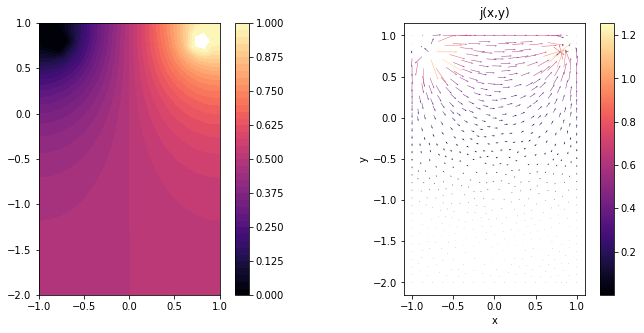

In [49]:
V=run_solver2(20,0.1)

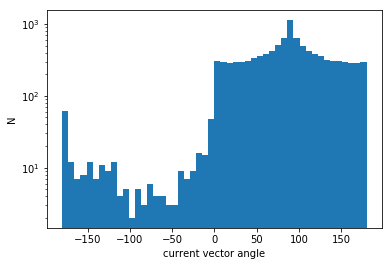

In [50]:
jx=project(V.dx(0))
jy=project(V.dx(1))

x = np.linspace(-1,1,101)
y = np.linspace(-2,1,101)
jxvals=np.zeros([len(x),len(y)])
jyvals=np.zeros([len(x),len(y)])
for ii in range(0,len(x)):
    yvals = [(jx(x[ii],jj)) for jj in y]
    jxvals[ii,:]=yvals
    yvals = [(jy(x[ii],jj)) for jj in y]
    jyvals[ii,:]=yvals

    
z=np.degrees(np.arctan2(np.ravel(jxvals),np.ravel(jyvals)))
plt.hist(z,bins=50);
plt.yscale('log');plt.xlabel('current vector angle');plt.ylabel('N');

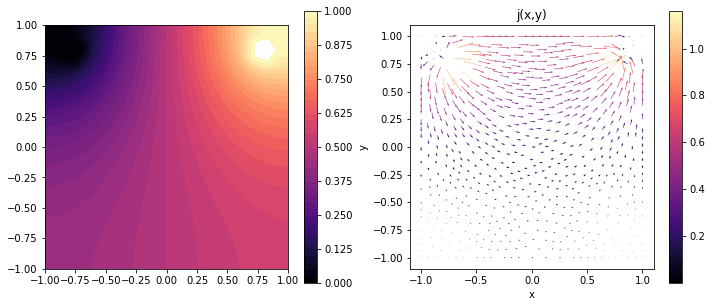

In [44]:
V=run_solver2(20,0.1)

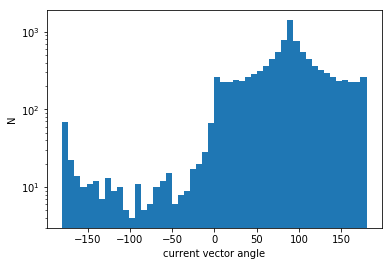

In [45]:
jx=project(V.dx(0))
jy=project(V.dx(1))

x = np.linspace(-1,1,101)
y = np.linspace(-1,1,101)
jxvals=np.zeros([len(x),len(y)])
jyvals=np.zeros([len(x),len(y)])
for ii in range(0,len(x)):
    yvals = [(jx(x[ii],jj)) for jj in y]
    jxvals[ii,:]=yvals
    yvals = [(jy(x[ii],jj)) for jj in y]
    jyvals[ii,:]=yvals

    
z=np.degrees(np.arctan2(np.ravel(jxvals),np.ravel(jyvals)))
plt.hist(z,bins=50);
plt.yscale('log');plt.xlabel('current vector angle');plt.ylabel('N');

J=0.560773583831
ΔV=0.122856598837
J/ΔV=4.56445635919


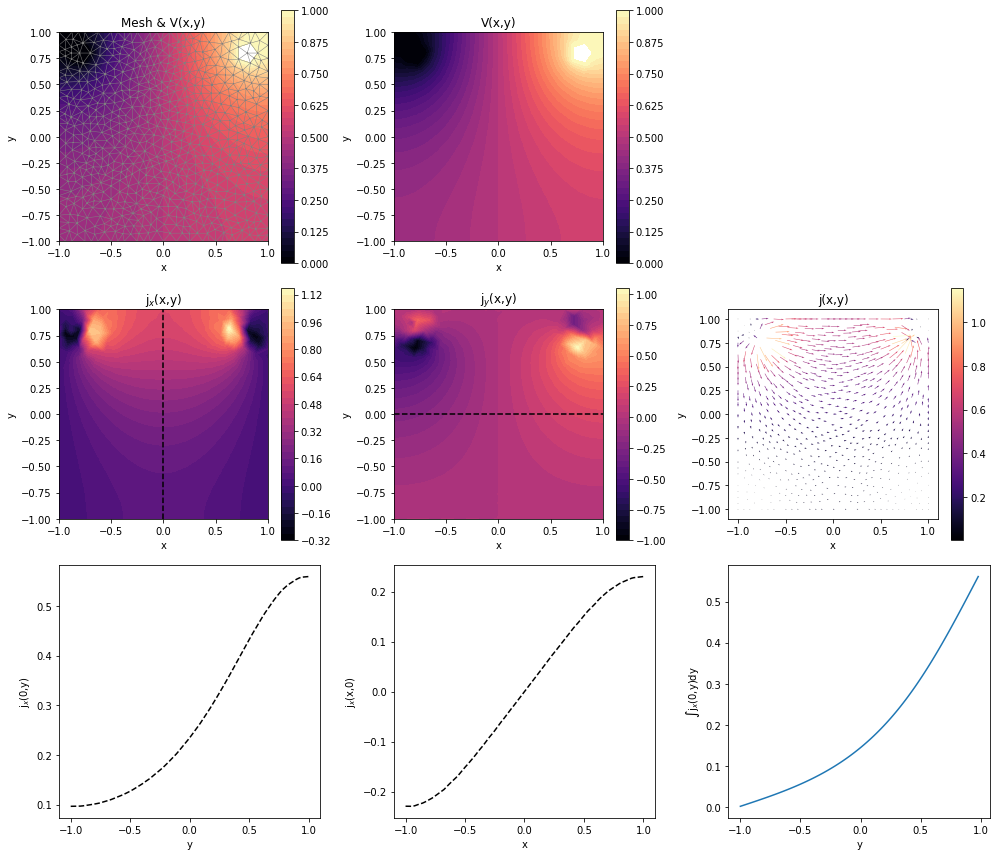

In [12]:
run_solver(20,0.1)